In [1]:
# python
import os
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from hist import intervals
import coffea.util
# import numpy as np
import mplhep as hep
import numpy as np
import warnings

In [2]:
import yaml
yaml_file_path = '../../configs/ntuples/signal_2mu2e_v10.yaml'
# Open and read the YAML file
with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)
signals_all = list(data["llpNanoAOD_v2"]["samples"].keys())
# for x in range(len(signals_all)):
#     # if x == 0:
#     print("'" + signals_all[x] + "',")


In [3]:
QCD=[ 
     "QCD_Pt15To20", 
     "QCD_Pt20To30",
     "QCD_Pt30To50",
     "QCD_Pt50To80",
     "QCD_Pt80To120",
     "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
     "QCD_Pt470To600",
     "QCD_Pt600To800",
    "QCD_Pt800To1000",
     "QCD_Pt1000",
    ]
DY = [ 
    "DYJetsToMuMu_M10to50",
    "DYJetsToMuMu_M50",
     ]
TT = [ 
    "TTJets",
     ]

bgs=  TT + QCD + DY





In [4]:
S = [
 '2Mu2E_500GeV_0p25GeV_0p004mm',
'2Mu2E_500GeV_0p25GeV_4p0mm',
'2Mu2E_500GeV_5p0GeV_0p08mm',
'2Mu2E_500GeV_5p0GeV_80p0mm',

]

2Mu2E_500GeV_0p25GeV_0p04mm
2Mu2E_500GeV_0p25GeV_2p0mm
2Mu2E_500GeV_5p0GeV_0p8mm
2Mu2E_500GeV_5p0GeV_40p0mm


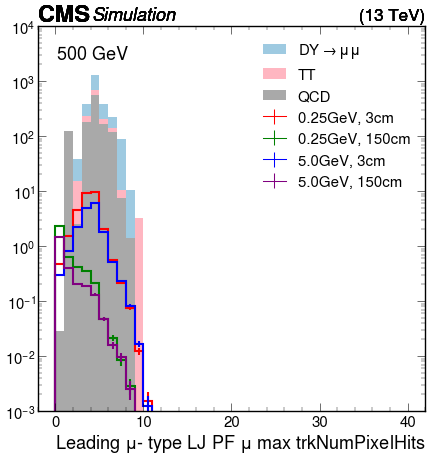

2Mu2E_500GeV_0p25GeV_0p04mm
2Mu2E_500GeV_0p25GeV_2p0mm
2Mu2E_500GeV_5p0GeV_0p8mm
2Mu2E_500GeV_5p0GeV_40p0mm


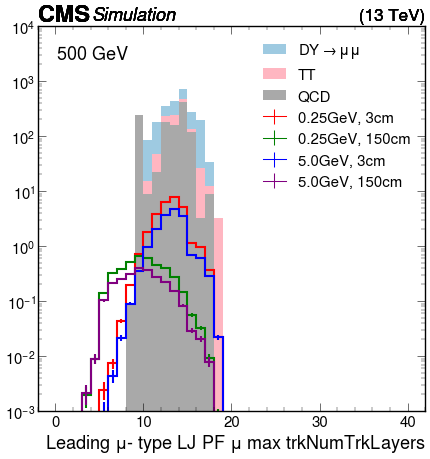

2Mu2E_500GeV_0p25GeV_0p04mm
2Mu2E_500GeV_0p25GeV_2p0mm
2Mu2E_500GeV_5p0GeV_0p8mm
2Mu2E_500GeV_5p0GeV_40p0mm


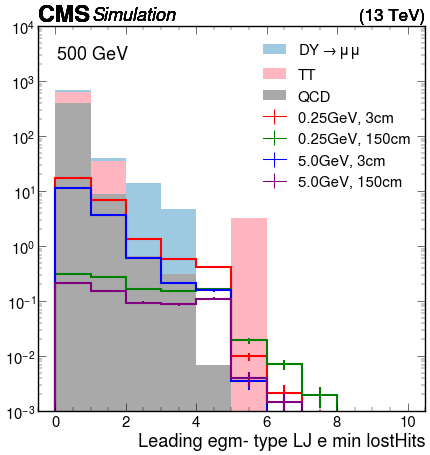

In [5]:
def sum_bgs_hist(bgs_list, histogram_name, channel_name):
    """
    Sum histograms for a list of backgrounds.
    """
    summed_hist = None
    
    for x in bgs_list:
        # print(x)
        output_bg = coffea.util.load(f"output_{x}{channel_name}.coffea")
        hist = output_bg["out"][x]["hists"][histogram_name][channel_name, :]
        
        if summed_hist is None:
            summed_hist = hist.copy()
        else:
            summed_hist += hist
    
    return summed_hist
channel_name = "base_ljObjCut_ljIso_2lj"
output_signal = coffea.util.load(f"output_signal_{channel_name}.coffea" )
title_list = [
             r"",
              r"",
             ]
histogram_list  = [ 
 
# "mu_lj_n",
# "egm_lj_n", 
# "leading_mu_lj_muon_max_trkNumPixelHits",
# "leading_pf_mu_lj_pfMu_max_trkNumPixelHits", 
# "leading_pf_dsa_mu_lj_pfMu_max_trkNumPixelHits",
# "leading_mu_lj_pfMu_max_trkNumPixelHits",
"leading_mu_lj_pfMu_max_trkNumPixelHits",
# "leading_mu_lj_muon_max_trkNumTrkLayers",
"leading_mu_lj_pfMu_max_trkNumTrkLayers",
# "leading_pf_mu_lj_pfMu_max_trkNumTrkLayers",
# "leading_pf_dsa_mu_lj_pfMu_max_trkNumTrkLayers",
"leading_egm_lj_electron_min_lostHits",

# "leading_e_lj_electron_min_lostHits",
# "leading_eg_lj_electron_min_lostHits",

]
S = [
   
'2Mu2E_500GeV_0p25GeV_0p04mm',

'2Mu2E_500GeV_0p25GeV_2p0mm',
'2Mu2E_500GeV_5p0GeV_0p8mm',
'2Mu2E_500GeV_5p0GeV_40p0mm',

]
# sum_bg = sum_bgs_hist(QCD, histogram_name,channel_name )
for i, histogram_name in enumerate(histogram_list):
    # print(i, histogram_name, title_list[i])
    # plt.figure(figsize=(10, 10))
    sum_bg_qcd = sum_bgs_hist(QCD, histogram_name,channel_name )
    sum_bg_tt = sum_bgs_hist(TT, histogram_name,channel_name )
    sum_bg_dy = sum_bgs_hist(DY, histogram_name,channel_name )
    
    utilities.plot(
    [sum_bg_qcd, sum_bg_tt,
      sum_bg_dy
    ],
    flow="none",
    yerr=True,
    density=False,
    histtype="fill",
    color=["#A9A9A9", "#FFB6C1",
           "#9ECAE1"
          ],
    label=["QCD", "TT",
         r"DY$\rightarrow \mu\mu$"
          ],
    stack=True,
)
    labels = ["3cm", "150cm", "3cm", "150cm"]
    colors = ['r', 'g', 'b', 'purple']
    for i, s in enumerate(S):
        print(s)
        parts = s.split("_")
        mass = parts[1]
        zd_mass = parts[2].replace("p", ".")
        ctau = parts[3].replace("p", ".").replace("mm", "")
        label =  zd_mass + ", " + labels[i]
        histogram = output_signal["out"][s]["hists"][histogram_name][channel_name, :]

    # print(histogram.values())
        utilities.plot(histogram, flow ="none", yerr=True, density=False, label=label, color=colors[i] ,linewidth=3)
    hep.label.exp_text(text="500 GeV ", loc=3) 
    plt.yscale("log")
    # plt.title(histogram_name)
    plt.legend()
    plt.ylim(1e-3, 1e4)
    plt.savefig("/home/cms-jovyan/SIDM/plots/" + histogram_name + ".png", dpi=300)
    plt.show()
    # plt.savefig("/home/cms-jovyan/SIDM/plots/" + histogram_name + ".png")
    plt.close()